In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Exercise 01

<img src="./imgs/exercise_01.png" alt="Exercise 01" width="600"/>   

Let's solve this using  Metropolis Algorithm.

In [2]:
A = 1
num_iter = 1000000
kT_arr = np.array([0.1, 0.5, 1, 2])
energy_arr = np.linspace(0, 13, 500)

In [3]:
def metropolis_boltzman(num_iter, energy_arr, A, kT):
    energy_distribution = np.zeros(num_iter)

    N_energies = energy_arr.shape[0]
    current_energy = energy_arr[0]
    current_energy_prob = A*np.exp(-current_energy/kT)
    for i in range(num_iter):
        new_energy = energy_arr[random.randint(0, N_energies-1)]
        new_energy_prob = A*np.exp(-new_energy/kT)
        gamma = min(1, new_energy_prob/current_energy_prob)

        if (random.uniform(0, 1) <= gamma):
            current_energy = new_energy
            current_energy_prob = new_energy_prob

        energy_distribution[i] = current_energy

    return energy_distribution

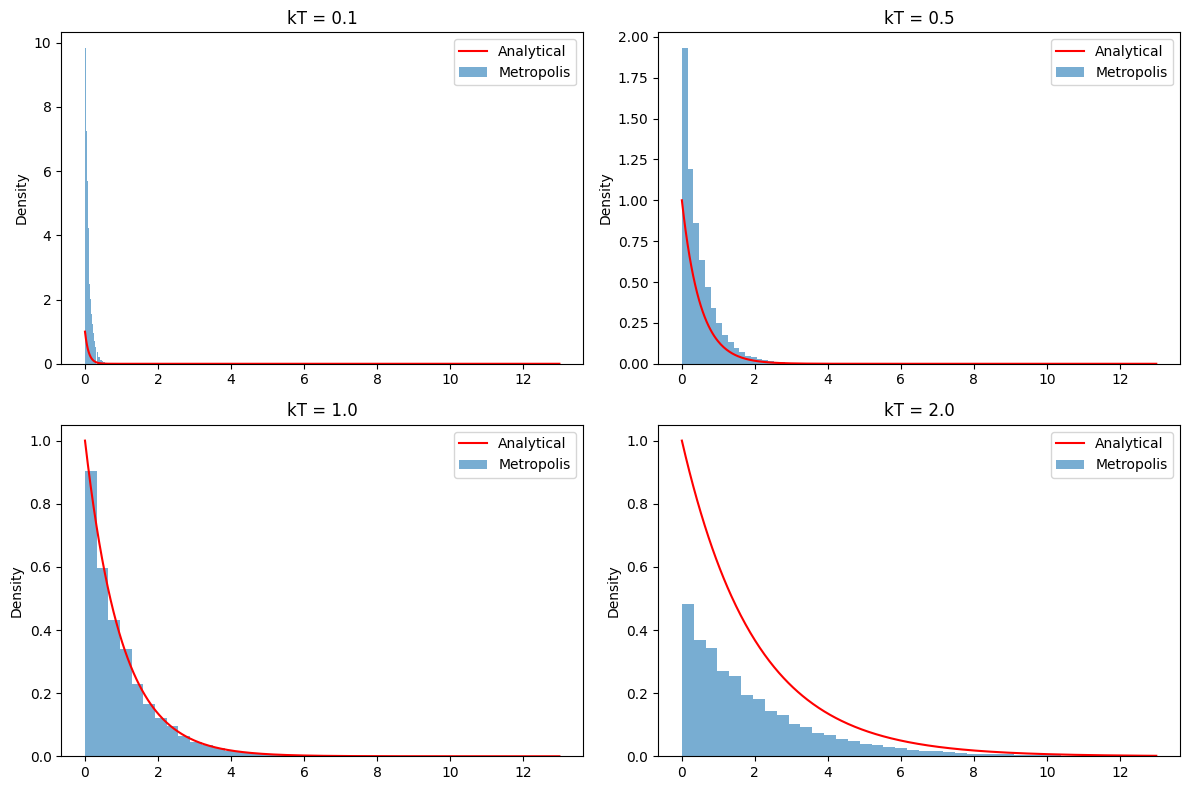

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for idx, kT in enumerate(kT_arr):
    energy_distribution = metropolis_boltzman(num_iter, energy_arr, A, kT)
    analytical_energy_distribution = A * np.exp(-energy_arr / kT)

    ax = axs[idx // 2, idx % 2]
    ax.plot(energy_arr, analytical_energy_distribution, c="r", label="Analytical")
    ax.hist(energy_distribution, bins=40, density=True, alpha=0.6, label="Metropolis")
    ax.set_title(f"kT = {kT}")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()

There is a clear deviation of the analytical distribution line from the histograms obtained from the algorithm in kT={0.1, 0.5, 2} cases. The reason for this is that $A=1 \text{ (constant)}$ is set. However, by the normalization condition $\int_{0}^{\infty} Ae^{-\frac{\epsilon}{kT}} = 1 \rightarrow A = \frac{1}{kT}$, A varies with the value of kT. This does not affect the metropolis algorithm because the stationary probability ratio is considered in the $\Gamma$ value $\left( \Gamma(x, x') = min \left[ 1, \frac{\pi(x')}{\pi(x)} \right] \right)$.

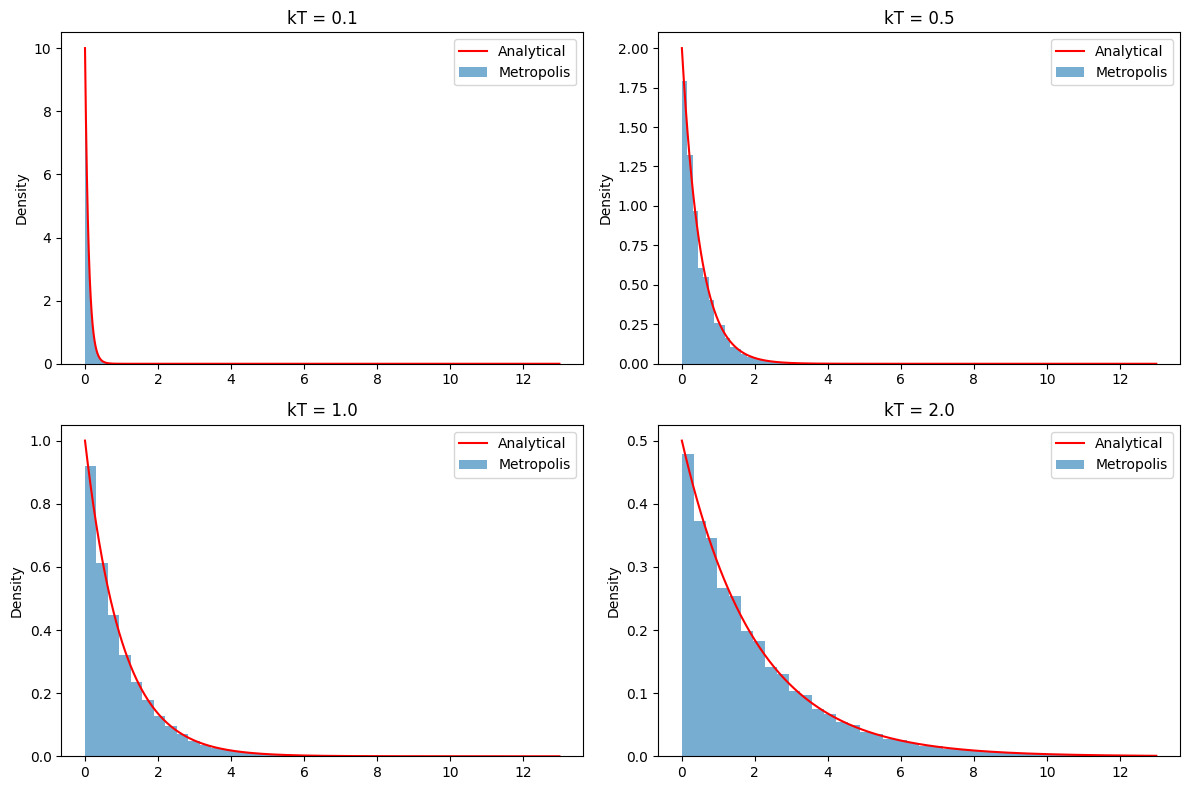

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for idx, kT in enumerate(kT_arr):
    energy_distribution = metropolis_boltzman(num_iter, energy_arr, A, kT)
    analytical_energy_distribution = (1/kT) * np.exp(-energy_arr/kT)

    ax = axs[idx // 2, idx % 2]
    ax.plot(energy_arr, analytical_energy_distribution, c="r", label="Analytical")
    ax.hist(energy_distribution, bins=40, density=True, alpha=0.6, label="Metropolis")
    ax.set_title(f"kT = {kT}")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()

## Exercise 02

<img src="./imgs/exercise_02.png" alt="Exercise 02" width="700"/>

Using time-driven simulations and assuming elastic collision bewteen particles and the wall,

   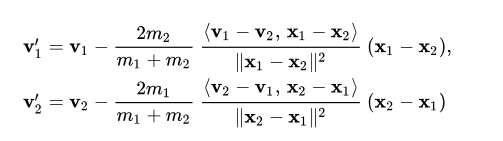

In [3]:
class Disk:
    vel = np.empty(2)
    pos_arr = np.empty((1, 2))

    def __init__(self, init_pos, init_vel, radius, wall_len, delta_t) -> None:
        self.pos_arr = np.array([init_pos])
        self.vel = init_vel
        self.radius = radius
        self.wall_len = wall_len
        self.delta_t = delta_t

    def move(self):
        new_pos = self.pos_arr[-1] + self.vel * self.delta_t
        self.pos_arr = np.vstack((self.pos_arr, new_pos))

    def is_wall_collision(self):
        if (self.pos_arr[-1][0] - self.radius <= 0) or (self.pos_arr[-1][0] + self.radius >= self.wall_len):
            self.vel[0] = -self.vel[0]
        if (self.pos_arr[-1][1] - self.radius <= 0) or (self.pos_arr[-1][1] + self.radius >= self.wall_len):
            self.vel[1] = -self.vel[1]

    def display_pos(self):
        print("Position ", self.pos_arr[-1])

def is_ball_collision(diskA: Disk, diskB: Disk):
    # assuming both balls have same velocity
    pos_diff = diskA.pos_arr[-1] - diskB.pos_arr[-1]
    distance = np.linalg.norm(pos_diff)
    if distance <= diskA.radius + diskB.radius:
        print("Prev:", diskA.vel, diskB.vel, end="\t")
        vel_diff = diskA.vel - diskB.vel
        diskA.vel = diskA.vel - (np.dot(vel_diff, pos_diff)/(distance**2)) * pos_diff
        diskB.vel = diskB.vel - (np.dot(-vel_diff, -pos_diff)/(distance**2)) * (-pos_diff)
        print("After:", diskA.vel, diskB.vel)

In [4]:
radius = 0.01
wall_len = 2
delta_t = 0.001
num_iter = 100000

diskA = Disk(np.array([0.5, 0.5]), np.array([0.2, 0.4]), radius, wall_len, delta_t)
diskB = Disk(np.array([0.705, 0.905]), np.array([-0.2, -0.4]), radius, wall_len, delta_t)
for i in range(num_iter):
    diskA.is_wall_collision()
    diskB.is_wall_collision()
    is_ball_collision(diskA, diskB)
    diskA.move()
    diskB.move()

Prev: [0.2 0.4] [-0.2 -0.4]	After: [-0.2864461 -0.3434365] [0.2864461 0.3434365]
Prev: [ 0.2864461 -0.3434365] [-0.2864461  0.3434365]	After: [0.2331852 0.381608 ] [-0.2331852 -0.381608 ]


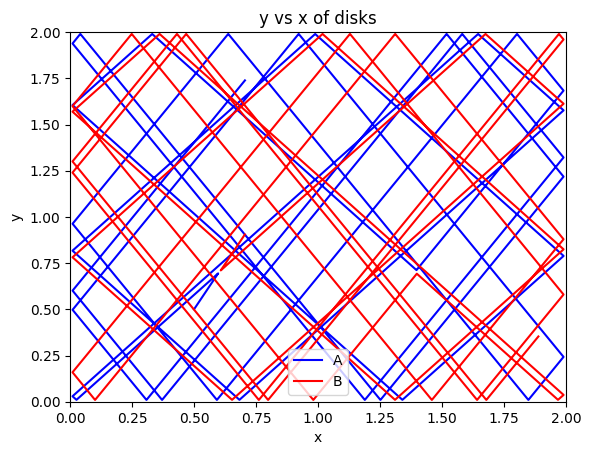

In [5]:
plt.figure()
plt.plot(diskA.pos_arr[:, 0], diskA.pos_arr[:, 1], c="b", label="A")
plt.plot(diskB.pos_arr[:, 0], diskB.pos_arr[:, 1], c="r", label="B")
plt.title("y vs x of disks")
plt.xlabel("x")
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.ylabel("y")
plt.legend()
plt.show()